In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Manipulation and Analysis Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import os
        
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, MaxPooling2D, Flatten, Conv2D, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **CHECK**

In [5]:
image=PIL.Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg")

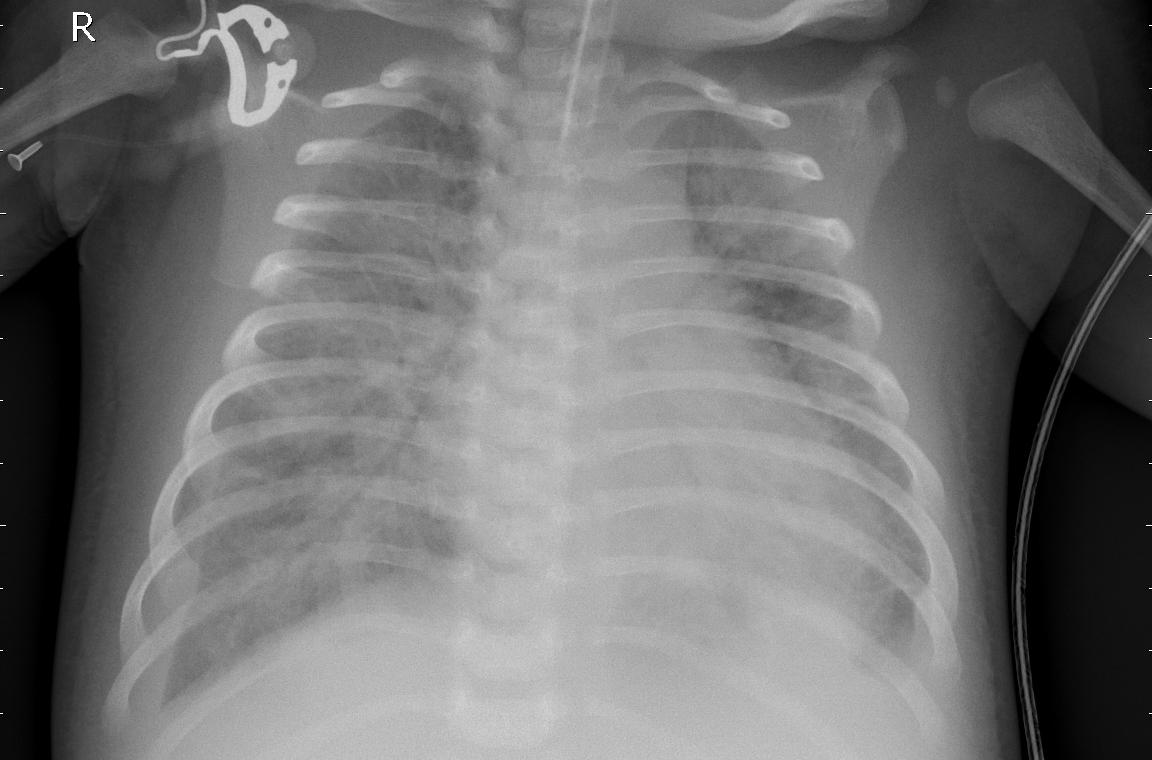

In [6]:
image

In [7]:
image_normal = PIL.Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg")

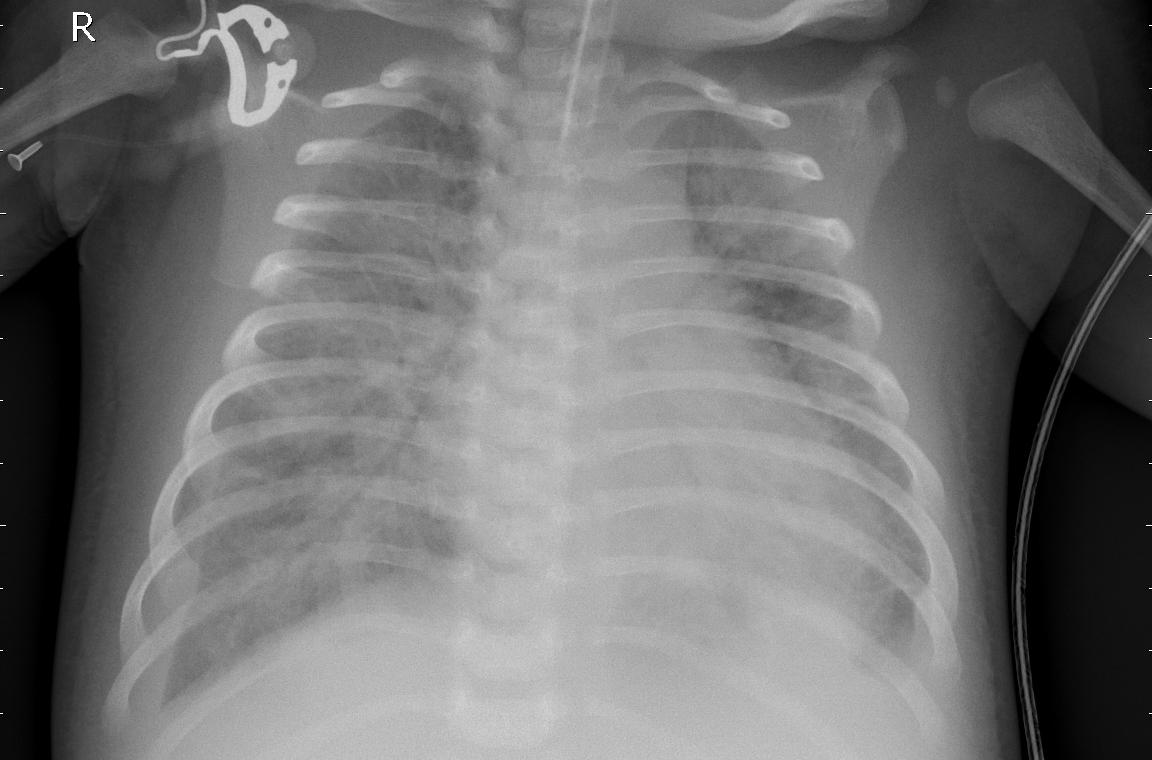

In [8]:
image

In [9]:
train_dir = "../input/chest-xray-pneumonia/chest_xray/train/"
val_dir = "../input/chest-xray-pneumonia/chest_xray/val/"
test_dir = "../input/chest-xray-pneumonia/chest_xray/test/"


In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [11]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up generators to read images from directories
batch_size = 32

## PREPROCESS

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
##for batch_data, batch_labels in train_generator:
##    output = resnet_model.predict(batch_data)
    print("Target shape:", batch_labels.shape)
    print("Output shape:", output.shape)

NameError: name 'resnet_model' is not defined

In [14]:
input_shape = (224, 224, 3) 

# Create the input layer
inputs = tf.keras.Input(shape=input_shape)

## RESNET50

In [15]:
resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [16]:
resnet_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [17]:
for layer in resnet_model.layers[-10:]:
    layer.trainable = True

In [18]:

outputs = resnet_model(inputs)


In [19]:
dense_layer = Dense(1, activation='sigmoid')(outputs)

In [20]:
new_model = Model(inputs=inputs, outputs=dense_layer)

In [21]:
resnet_model.trainable = False

In [22]:
x = layers.GlobalAveragePooling2D()(resnet_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)

In [23]:
fine_tuned_model = tf.keras.models.Model(inputs=resnet_model.input, outputs=output)

In [24]:
fine_tuned_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])


In [29]:
history = fine_tuned_model.fit(train_generator,
                                epochs=15,
                                validation_data=validation_generator)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step - accuracy: 0.6982 - loss: 0.6266 - val_accuracy: 0.5000 - val_loss: 0.8340
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 489s 3s/step - accuracy: 0.7429 - loss: 0.5705 - val_accuracy: 0.5000 - val_loss: 0.8106
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 487s 3s/step - accuracy: 0.7393 - loss: 0.5407 - val_accuracy: 0.5000 - val_loss: 0.8438
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 501s 3s/step - accuracy: 0.7367 - loss: 0.5233 - val_accuracy: 0.5000 - val_loss: 0.8431
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 502s 3s/step - accuracy: 0.7508 - loss: 0.5010 - val_accuracy: 0.5000 - val_loss: 0.7847
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 502s 3s/step - accuracy: 0.7650 - loss: 0.4708 - val_accuracy: 0.5625 - val_loss: 0.7149
Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 502s 3s/step - accuracy: 0.7574 - loss: 0.4723 - val_accuracy: 0.5625 - val_loss: 0.6866
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 504s 3s/step - accuracy: 0.7622 - loss: 0.4603 - val_accuracy: 0.562

In [25]:
test_loss, test_accuracy = fine_tuned_model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.3624 - loss: 0.8418
Test Loss: 0.833238422870636, Test Accuracy: 0.375


In [26]:
predictions = fine_tuned_model.predict(test_generator)

20/20 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

predicted_labels = predictions > 0.5

true_labels = test_generator.classes

print(classification_report(true_labels, predicted_labels))

print(confusion_matrix(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.31      0.19      0.23       234
           1       0.60      0.74      0.67       390

    accuracy                           0.54       624
   macro avg       0.45      0.47      0.45       624
weighted avg       0.49      0.54      0.50       624

[[ 44 190]
 [100 290]]


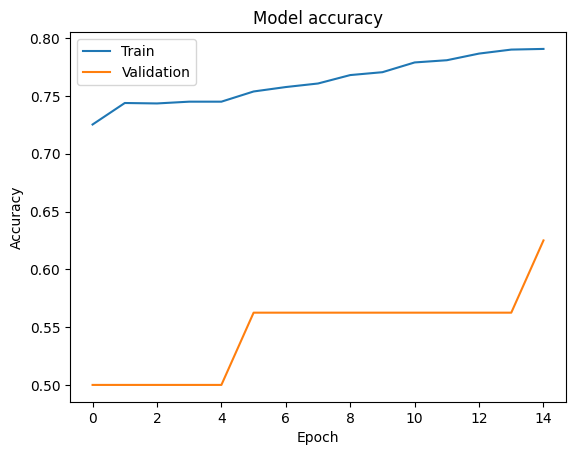

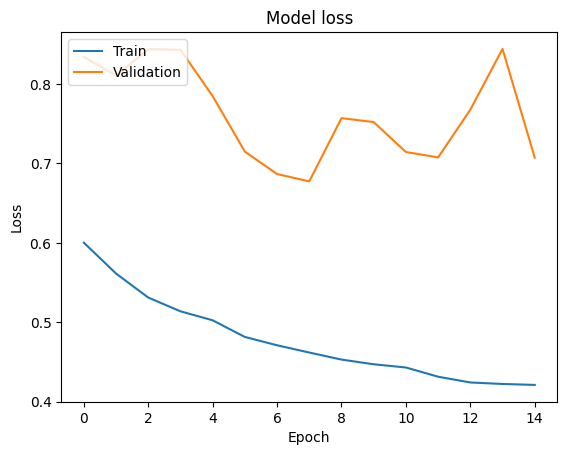

In [35]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **INCEPTION V3**

In [36]:
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [39]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [43]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 28,100,389 (107.19 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 4,198,404 (16.02 MB)

In [40]:
# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [41]:
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)


Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.8252 - loss: 0.6690 - val_accuracy: 0.9375 - val_loss: 0.3536
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.9185 - loss: 0.1994 - val_accuracy: 0.8750 - val_loss: 0.2785
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.9116 - loss: 0.2153 - val_accuracy: 0.9375 - val_loss: 0.2907
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - accuracy: 0.9282 - loss: 0.1809 - val_accuracy: 0.8125 - val_loss: 0.3691
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.9333 - loss: 0.1673 - val_accuracy: 0.7500 - val_loss: 0.4274
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.9352 - loss: 0.1751 - val_accuracy: 0.8750 - val_loss: 0.3163
Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - accuracy: 0.9378 - loss: 0.1597 - val_accuracy: 0.8750 - val_loss: 0.2680
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.9272 - loss: 0.1891 - val_accu

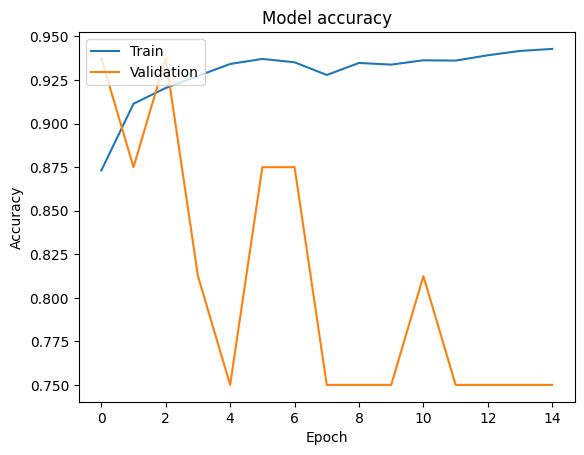

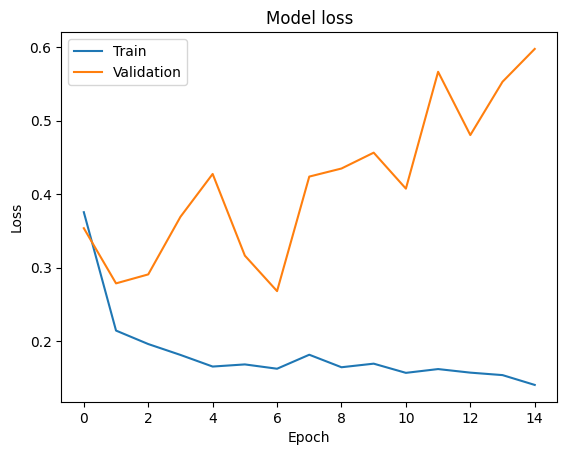

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **VGG16**

In [63]:
def create_vgg16():
    model = Sequential()
    
    # Convolutional layers
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    
    return model


In [64]:
vgg16_model = create_vgg16()

In [65]:
vgg16_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_120 (Conv2D)             │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_121 (Conv2D)             │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_122 (Conv2D)             │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_123 (Conv2D)             │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_124 (Conv2D)             │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_125 (Conv2D)             │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_126 (Conv2D)             │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_127 (Conv2D)             │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_128 (Conv2D)             │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_129 (Conv2D)             │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_130 (Conv2D)             │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_131 (Conv2D)             │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_132 (Conv2D)             │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,264,641 (512.18 MB)

 Trainable params: 134,264,641 (512.18 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
sgd_optimizer = SGD(learning_rate=0.001)
vgg16_model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = vgg16_model.fit(train_generator,
                          epochs=15,
                          validation_data=validation_generator)

Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 5260s 32s/step - accuracy: 0.7211 - loss: 0.6127 - val_accuracy: 0.5000 - val_loss: 0.8118
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 5311s 32s/step - accuracy: 0.7425 - loss: 0.5712 - val_accuracy: 0.5000 - val_loss: 0.7929
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 5258s 32s/step - accuracy: 0.7430 - loss: 0.5708 - val_accuracy: 0.5000 - val_loss: 0.8500
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 5265s 32s/step - accuracy: 0.7378 - loss: 0.5772 - val_accuracy: 0.5000 - val_loss: 0.8135
Epoch 5/15
 31/163 ━━━━━━━━━━━━━━━━━━━━ 1:10:04 32s/step - accuracy: 0.7239 - loss: 0.5896

In [71]:
history = vgg16_model.fit(train_generator,
                          epochs=15,
                          validation_data=validation_generator)

Epoch 1/15
  2/163 ━━━━━━━━━━━━━━━━━━━━ 1:24:49 32s/step - accuracy: 0.7188 - loss: 0.6184

KeyboardInterrupt: 

## **custom cnn**

In [32]:
def create_custom_model():
    
    # Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(224, 224, 3))
    
    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)
    
    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    # Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model


In [34]:
keras.backend.clear_session()

model = create_custom_model()
model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=3e-5), metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,272,353 (12.48 MB)

 Trainable params: 3,272,129 (12.48 MB)

 Non-trainable params: 224 (896.00 B)

In [35]:
history = model.fit(train_generator,
                          epochs=15,
                          validation_data=validation_generator)

Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.7024 - loss: 0.6534 - val_accuracy: 0.5000 - val_loss: 1.7003
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.7894 - loss: 0.4358 - val_accuracy: 0.5000 - val_loss: 2.8676
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.8401 - loss: 0.3365 - val_accuracy: 0.5000 - val_loss: 3.5863
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.8649 - loss: 0.2960 - val_accuracy: 0.5000 - val_loss: 2.7846
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.8761 - loss: 0.2820 - val_accuracy: 0.5625 - val_loss: 2.0653
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.8928 - loss: 0.2573 - val_accuracy: 0.6250 - val_loss: 2.1191
Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.8893 - loss: 0.2438 - val_accuracy: 0.6250 - val_loss: 1.8605
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - accuracy: 0.8906 - loss: 0.2457 - val_accu

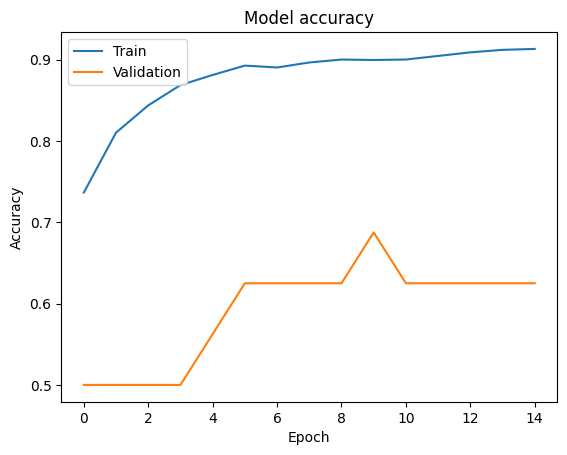

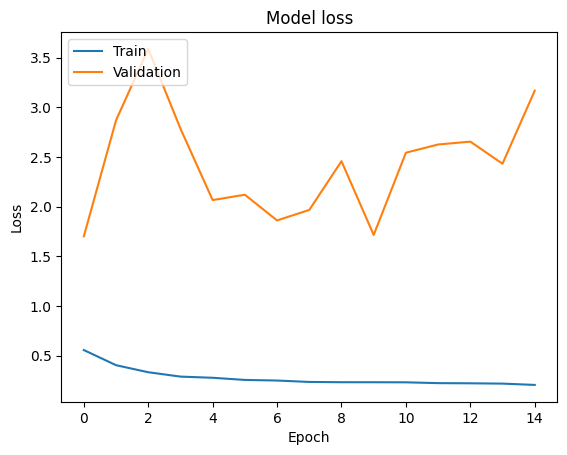

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Solving overfitting problem

In [47]:
def create_custom_model2(input_shape=(224, 224, 3)):
    model = Sequential()
    
    # Convolutional layers
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Flatten layer
    model.add(Flatten())
    
    # Dense layers
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))  # Adding dropout for regularization
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    return model



In [48]:
custom_model = create_custom_model2()

# Compile the model
custom_model.compile(keras.optimizers.Adam(learning_rate=1e-4),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [49]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [50]:
history = custom_model.fit(train_generator,
                           epochs=10,
                           validation_data=validation_generator,
                           callbacks=[early_stopping])

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.7410 - loss: 0.5812 - val_accuracy: 0.5000 - val_loss: 0.7040
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.7574 - loss: 0.3957 - val_accuracy: 0.5000 - val_loss: 0.8549
Epoch 3/10



KeyboardInterrupt



In [51]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [53]:
def create_custom_model3(input_shape=(224, 224, 3)):
    model = Sequential()
    

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
   
    model.add(Flatten())
    
    # Dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  
    

    model.add(Dense(1, activation='sigmoid'))
    
    return model

custom_model = create_custom_model3()

In [55]:
custom_model.compile(keras.optimizers.Adam(learning_rate=1e-4),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [56]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)


In [57]:
history = custom_model.fit(train_generator,
                           epochs=10,
                           validation_data=validation_generator,
                           callbacks=[early_stopping, reduce_lr])


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.7366 - loss: 0.5560 - val_accuracy: 0.6250 - val_loss: 0.8271 - learning_rate: 1.0000e-04
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.8337 - loss: 0.3435 - val_accuracy: 0.6875 - val_loss: 0.5663 - learning_rate: 1.0000e-04
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.8549 - loss: 0.3089 - val_accuracy: 0.7500 - val_loss: 0.5931 - learning_rate: 1.0000e-04
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.8613 - loss: 0.2987 - val_accuracy: 0.6250 - val_loss: 0.9580 - learning_rate: 1.0000e-04
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.8759 - loss: 0.2869 - val_accuracy: 0.6250 - val_loss: 0.9026 - learning_rate: 1.0000e-04
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.8841 - loss: 0.2713 - val_accuracy: 0.6250 - val_loss: 1.0608 - learning_rate: 1.0000e-05
Epoch 7/10


KeyboardInterrupt: 

In [61]:
from tensorflow.keras.layers import Dropout

def create_custom_model_4(input_shape=(224, 224, 3)):
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
 
    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))  

    model.add(Dense(1, activation='sigmoid'))
    
    return model

custom_model_4 = create_custom_model_4()

In [62]:
custom_model_4.compile(keras.optimizers.Adam(learning_rate=1e-4),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [64]:
history = custom_model_4.fit(train_generator,
                             epochs=5,
                             validation_data=validation_generator)

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.7568 - loss: 0.5172 - val_accuracy: 0.6250 - val_loss: 0.5514
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.8285 - loss: 0.3394 - val_accuracy: 0.6250 - val_loss: 0.7582
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.8487 - loss: 0.3085 - val_accuracy: 0.6875 - val_loss: 0.8466
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.8553 - loss: 0.3078 - val_accuracy: 0.6250 - val_loss: 0.8352
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.8659 - loss: 0.2937 - val_accuracy: 0.7500 - val_loss: 0.6088


In [65]:
test_loss, test_accuracy = custom_model_4.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 431ms/step - accuracy: 0.8563 - loss: 0.3550
Test Loss: 0.35602667927742004, Test Accuracy: 0.8493589758872986


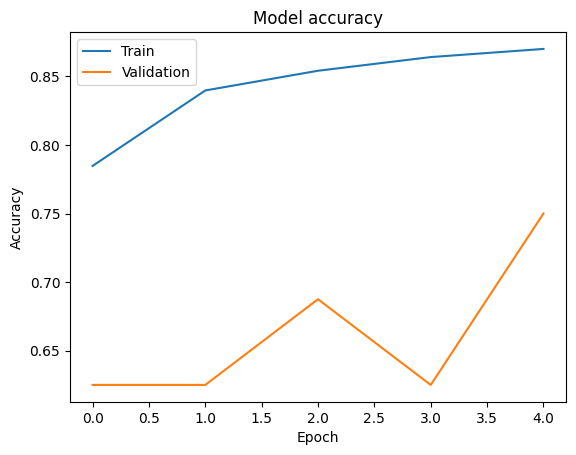

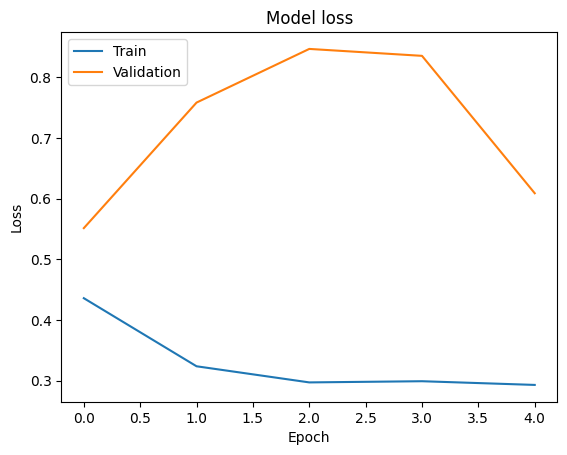

In [66]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


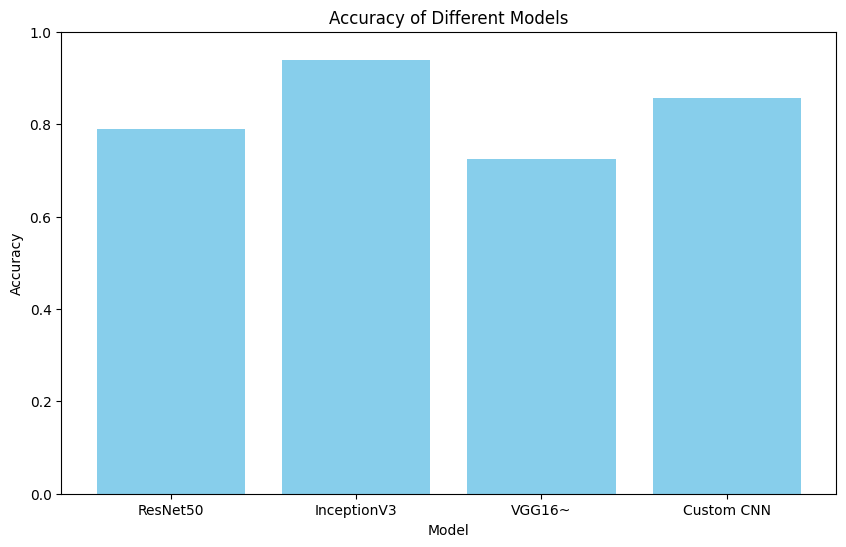

In [68]:
model_names = ['ResNet50', 'InceptionV3', 'VGG16~', 'Custom CNN'] 
accuracy_scores = [0.7902, 0.9388, 0.7239, 0.8563 ]  

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1) 
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: Pneumonia


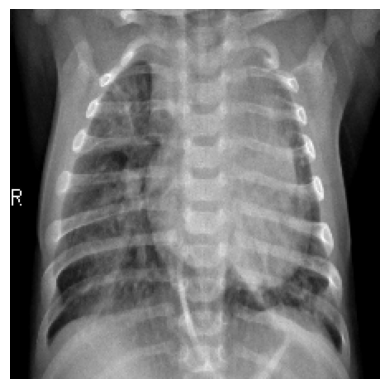

In [72]:
from tensorflow.keras.preprocessing import image

img_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg' 
img = image.load_img(img_path, target_size=(224, 224))  
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  # 

img_array /= 255.  

prediction = custom_model_4.predict(img_array)

if prediction[0] > 0.5:
    print("Prediction: Normal")
else:
    print("Prediction: Pneumonia")


plt.imshow(img)
plt.axis('off')
plt.show()